### Importação dos dados



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


[np.float64(1534509.12), np.float64(1488459.06), np.float64(1464025.03), np.float64(1384497.58)]
O faturamento máximo foi de R$1534509.12, da loja 1. O mínimo foi de R$1384497.58 da loja 4.


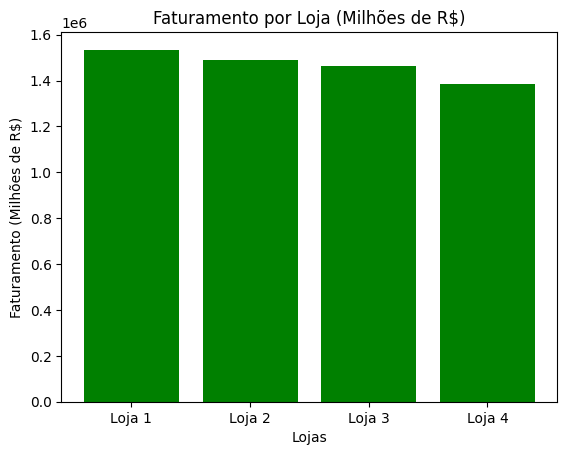

In [13]:
# Cálculo do faturamento de todas as lojas. Ponho em uma lista:
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
print(faturamentos)

# Neste print coloco o +1 para
print(f'O faturamento máximo foi de R${max(faturamentos)}, da loja {faturamentos.index(max(faturamentos)) + 1}. O mínimo foi de R${min(faturamentos)} da loja {faturamentos.index(min(faturamentos)) + 1}.')

# Determinando o plano cartesiano do gráfico de faturamento
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.bar(lojas, faturamentos, color = 'green')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (Milhões de R$)')
plt.title('Faturamento por Loja (Milhões de R$)')
plt.show()

In [14]:
'''
Loja 1 e Loja 4 tiveram os maiores e menores faturamentos, respectivamente.
Crio as variáveis de pontuação das lojas para ajudar a ver a melhor e pior ao final.
'''
pontuacao_loja = 0 + 3
pontuacao_loja2 = 0 + 2
pontuacao_loja3 = 0 + 1
pontuacao_loja4 = 0 + 0

# 2. Vendas por Categoria


In [15]:
## Verifico a quantidade de vendas por categoria para cada loja
categorias_loja = loja['Categoria do Produto'].value_counts()
categorias_loja2 = loja2['Categoria do Produto'].value_counts()
categorias_loja3 = loja3['Categoria do Produto'].value_counts()
categorias_loja4 = loja4['Categoria do Produto'].value_counts()

## Mostra todas as categorias e suas vendas para cada loja.
categorias_df = pd.concat([categorias_loja, categorias_loja2, categorias_loja3, categorias_loja4], axis = 1)
categorias_df.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
categorias_df

## Estes detalhes servem para estudo do próprio dono segundo suas preferências

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

A melhor média foi a da loja 3, com pontuação de 4.05 de 5
A pior média foi a da loja 1, com pontuação de 3.98 de 5


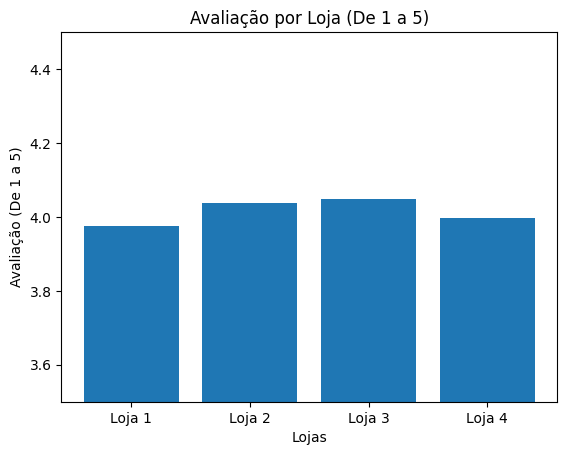

In [16]:
# Concatenando as médias em uma lista
lista_avaliacoes = [loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]

# Printa a melhor e pior loja, somando 1 ao index devido a leitura de listas sempre começar no index 0.
print(f'A melhor média foi a da loja {lista_avaliacoes.index(max(lista_avaliacoes)) + 1}, com pontuação de {max(lista_avaliacoes):.2f} de 5')
print(f'A pior média foi a da loja {lista_avaliacoes.index(min(lista_avaliacoes)) + 1}, com pontuação de {min(lista_avaliacoes):.2f} de 5')

# Atribuo a pontuação às lojas
pontuacao_loja = pontuacao_loja + 0
pontuacao_loja2 = pontuacao_loja2 + 2
pontuacao_loja3 = pontuacao_loja3 + 3
pontuacap_loja4 = pontuacao_loja4 + 1

# Plotar o gráfico
plt.bar(lojas, lista_avaliacoes)
plt.ylabel('Avaliação (De 1 a 5)'), plt.ylim(3.5, 4.5)
plt.xlabel('Lojas')
plt.title('Avaliação por Loja (De 1 a 5)')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [17]:
# Cria variáveis para produtos mais e menos vendida em cada loja:
# Loja 1
mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

# Loja 2
mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

# Loja 3
mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

# Loja 4
mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

In [18]:
# Criando e visualizando a tabela de produtos mais e menos vendidos
tabela_produtos = pd.DataFrame({
    'Loja 1': [mais_vendido_loja1, menos_vendido_loja1],
    'Loja 2': [mais_vendido_loja2, menos_vendido_loja2],
    'Loja 3': [mais_vendido_loja3, menos_vendido_loja3],
    'Loja 4': [mais_vendido_loja4, menos_vendido_loja4]
}, index=['Mais Vendido', 'Menos Vendido'])

tabela_produtos

,Loja 1,Loja 2,Loja 3,Loja 4
Mais Vendido,Micro-ondas,Iniciando em programação,Kit banquetas,Cama box
Menos Vendido,Headset,Jogo de tabuleiro,Blocos de montar,Guitarra


# 5. Frete Médio por Loja


A loja com maior média de frete foi a 1, com média de 38.06. O frete dessa loja variou entre R$1.01 e R$214.38
A loja com menor média de frete foi a 4, com média de 34.11. O frete dessa loja variou entre R$1.00 e R$206.33


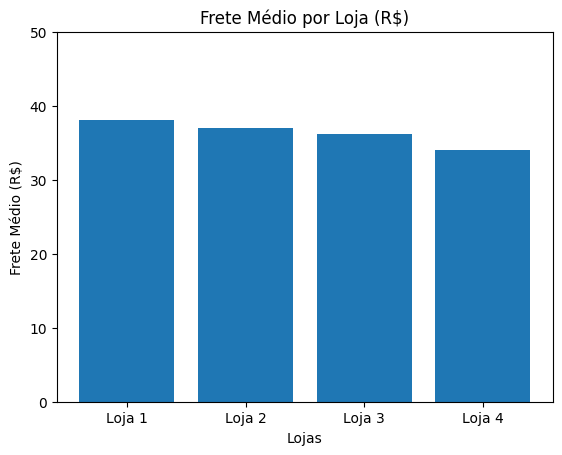

In [19]:
'''
Criando as variáveis de média para o frete
O média_frete_loja não pode considerar valores nulos no cálculo, ou a média seria menor que o real
Por segurança, troco os valores nulos por np.nan para o Numpy os ignorar
Com skipna = True, os valores nulos são ignorados
'''
loja['Frete'] = loja['Frete'].replace(0, np.nan)
loja2['Frete'] = loja2['Frete'].replace(0, np.nan)
loja3['Frete'] = loja3['Frete'].replace(0, np.nan)
loja4['Frete'] = loja4['Frete'].replace(0, np.nan)

# Concatenando as médias em uma lista
lista_frete = [loja['Frete'].mean(skipna=True), loja2['Frete'].mean(skipna=True), loja3['Frete'].mean(skipna=True), loja4['Frete'].mean(skipna=True)]

# Printa as lojas com maior e menor médias de frete
print(f'A loja com maior média de frete foi a {lista_frete.index(max(lista_frete)) + 1}, com média de {max(lista_frete):.2f}. O frete dessa loja variou entre R${loja["Frete"].min():.2f} e R${loja["Frete"].max():.2f}')
print(f'A loja com menor média de frete foi a {lista_frete.index(min(lista_frete)) + 1}, com média de {min(lista_frete):.2f}. O frete dessa loja variou entre R${loja4["Frete"].min():.2f} e R${loja4["Frete"].max():.2f}')

'''
A loja 1 possui média de frete alto. Frete é custo para cliente (se não coberto pela loja).
'''
pontuacao_loja = pontuacao_loja - 3
pontuacao_loja2 = pontuacao_loja2 - 2
pontuacao_loja3 = pontuacao_loja3 - 1
pontuacao_loja4 = pontuacao_loja4 - 0

plt.bar(lojas, lista_frete)
plt.ylabel('Frete Médio (R$)'), plt.ylim(0, 50)
plt.xlabel('Lojas')
plt.title('Frete Médio por Loja (R$)')
plt.show()

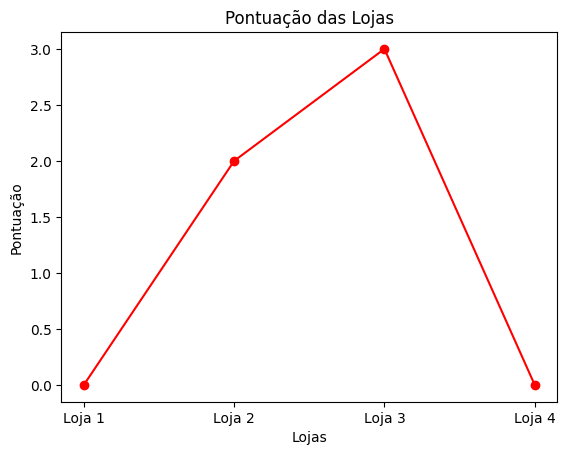

In [20]:
# Printando a pontuação das lojas para a análise final
pontuacoes = [pontuacao_loja, pontuacao_loja2, pontuacao_loja3, pontuacao_loja4]
plt.plot(lojas, pontuacoes, marker='o', linestyle='-', color='red')
plt.xlabel('Lojas')
plt.ylabel('Pontuação')
plt.title('Pontuação das Lojas')
plt.show()

In [21]:
print(loja2['Preço'].sum())
print(loja3['Preço'].sum())

1488459.06
1464025.03


# 6. Relatório

Olá, Sr. João. Espero que esteja bem. Segue arquivo da avaliação das lojas conforme solicitado. Os dados analisados forneceram os seguintes insights quanto às lojas:

**Objetivo:** Avaliar o desempenho das quatro lojas e recomendar a venda de uma delas.

**Metodologia:** Análise de indicadores como faturamento, avaliação da compra, frete médio e produtos mais/menos vendidos.

**Resultados:**

* Loja 1: Maior faturamento, mas com avaliação da compra abaixo da média e frete médio mais alto (frete = custo para o cliente = redução de fidelização).
* Loja 2: Faturamento e avaliação da compra equilibrados, frete médio intermediário.
* Loja 3: Faturamento mediano, melhor avaliação da compra, frete médio intermediário.
* Loja 4: Menor faturamento, avaliação da compra e frete médio abaixo da média.

**Recomendação:**

* Vender a Loja 1: Apesar da maior rentabilidade, a Loja 1 apresenta indicadores de satisfação do cliente inferiores, como avaliação da compra e frete médio. Sua venda pode gerar um alto valor de mercado para compradores que querem retorno imediato e pretendem investir no negócio.

* Alternativa: Vender a Loja 4, a de menor performance, para otimizar a rede, mesmo com um valor de venda menor. É uma loja com baixo valor de frete e avaliações não tão ruins, mas ao mesmo tempo fatura pouco. Assim, para otimizar a rede, vender a loja 4 pode potencializar os resultados gerais.

**Justificativa:**

A Loja 1, apesar do alto faturamento, pode apresentar problemas de fidelização de clientes devido à avaliação da compra em média baixa e frete médio mais alto. A venda da Loja 4, por sua vez, eliminaria a unidade de menor desempenho da rede, embora trouxesse menor lucro na venda. A escolha entre as duas opções depende da prioridade do proprietário: maior valor de venda ou otimização da rede. As lojas 2 e 3 demonstram um desempenho equilibrado e satisfatório, justificando sua permanência na rede.

Como pode ser visto no gráfico Pontuação das Lojas, quanto mais próximo a 0 mais indicada a loja é para venda. Para a avaliação da pontuação utilizei os seguintes critérios:

* 1º Lugar = +3 pontos
* 2º Lugar = +2 pontos
* 3º Lugar = +1 ponto
* 4º Lugar = +0 pontos

(OBS: Na média de frete por loja, a pontuação foi subtraída, pois o primeiro lugar significa mairo frete, que resulta em maior custo para o cliente.)

**Observações:**

A análise considerou indicadores quantitativos. Outros fatores, como localização, perfil do público e potencial de crescimento, podem influenciar na decisão final.